In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
import tempfile

In [2]:
IMG_DIR='./images/'

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

def binarized(image):
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [4]:
def set_image_dpi(im):
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300,300))
    return temp_filename

My Name s Hawa. 1 awn Compukes Scient ie .
My Fine) yeax g¥eqe '3 ‘NS On\we. pores
CW cacking System
 



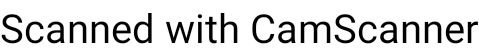

Scanned with CamScanner
 



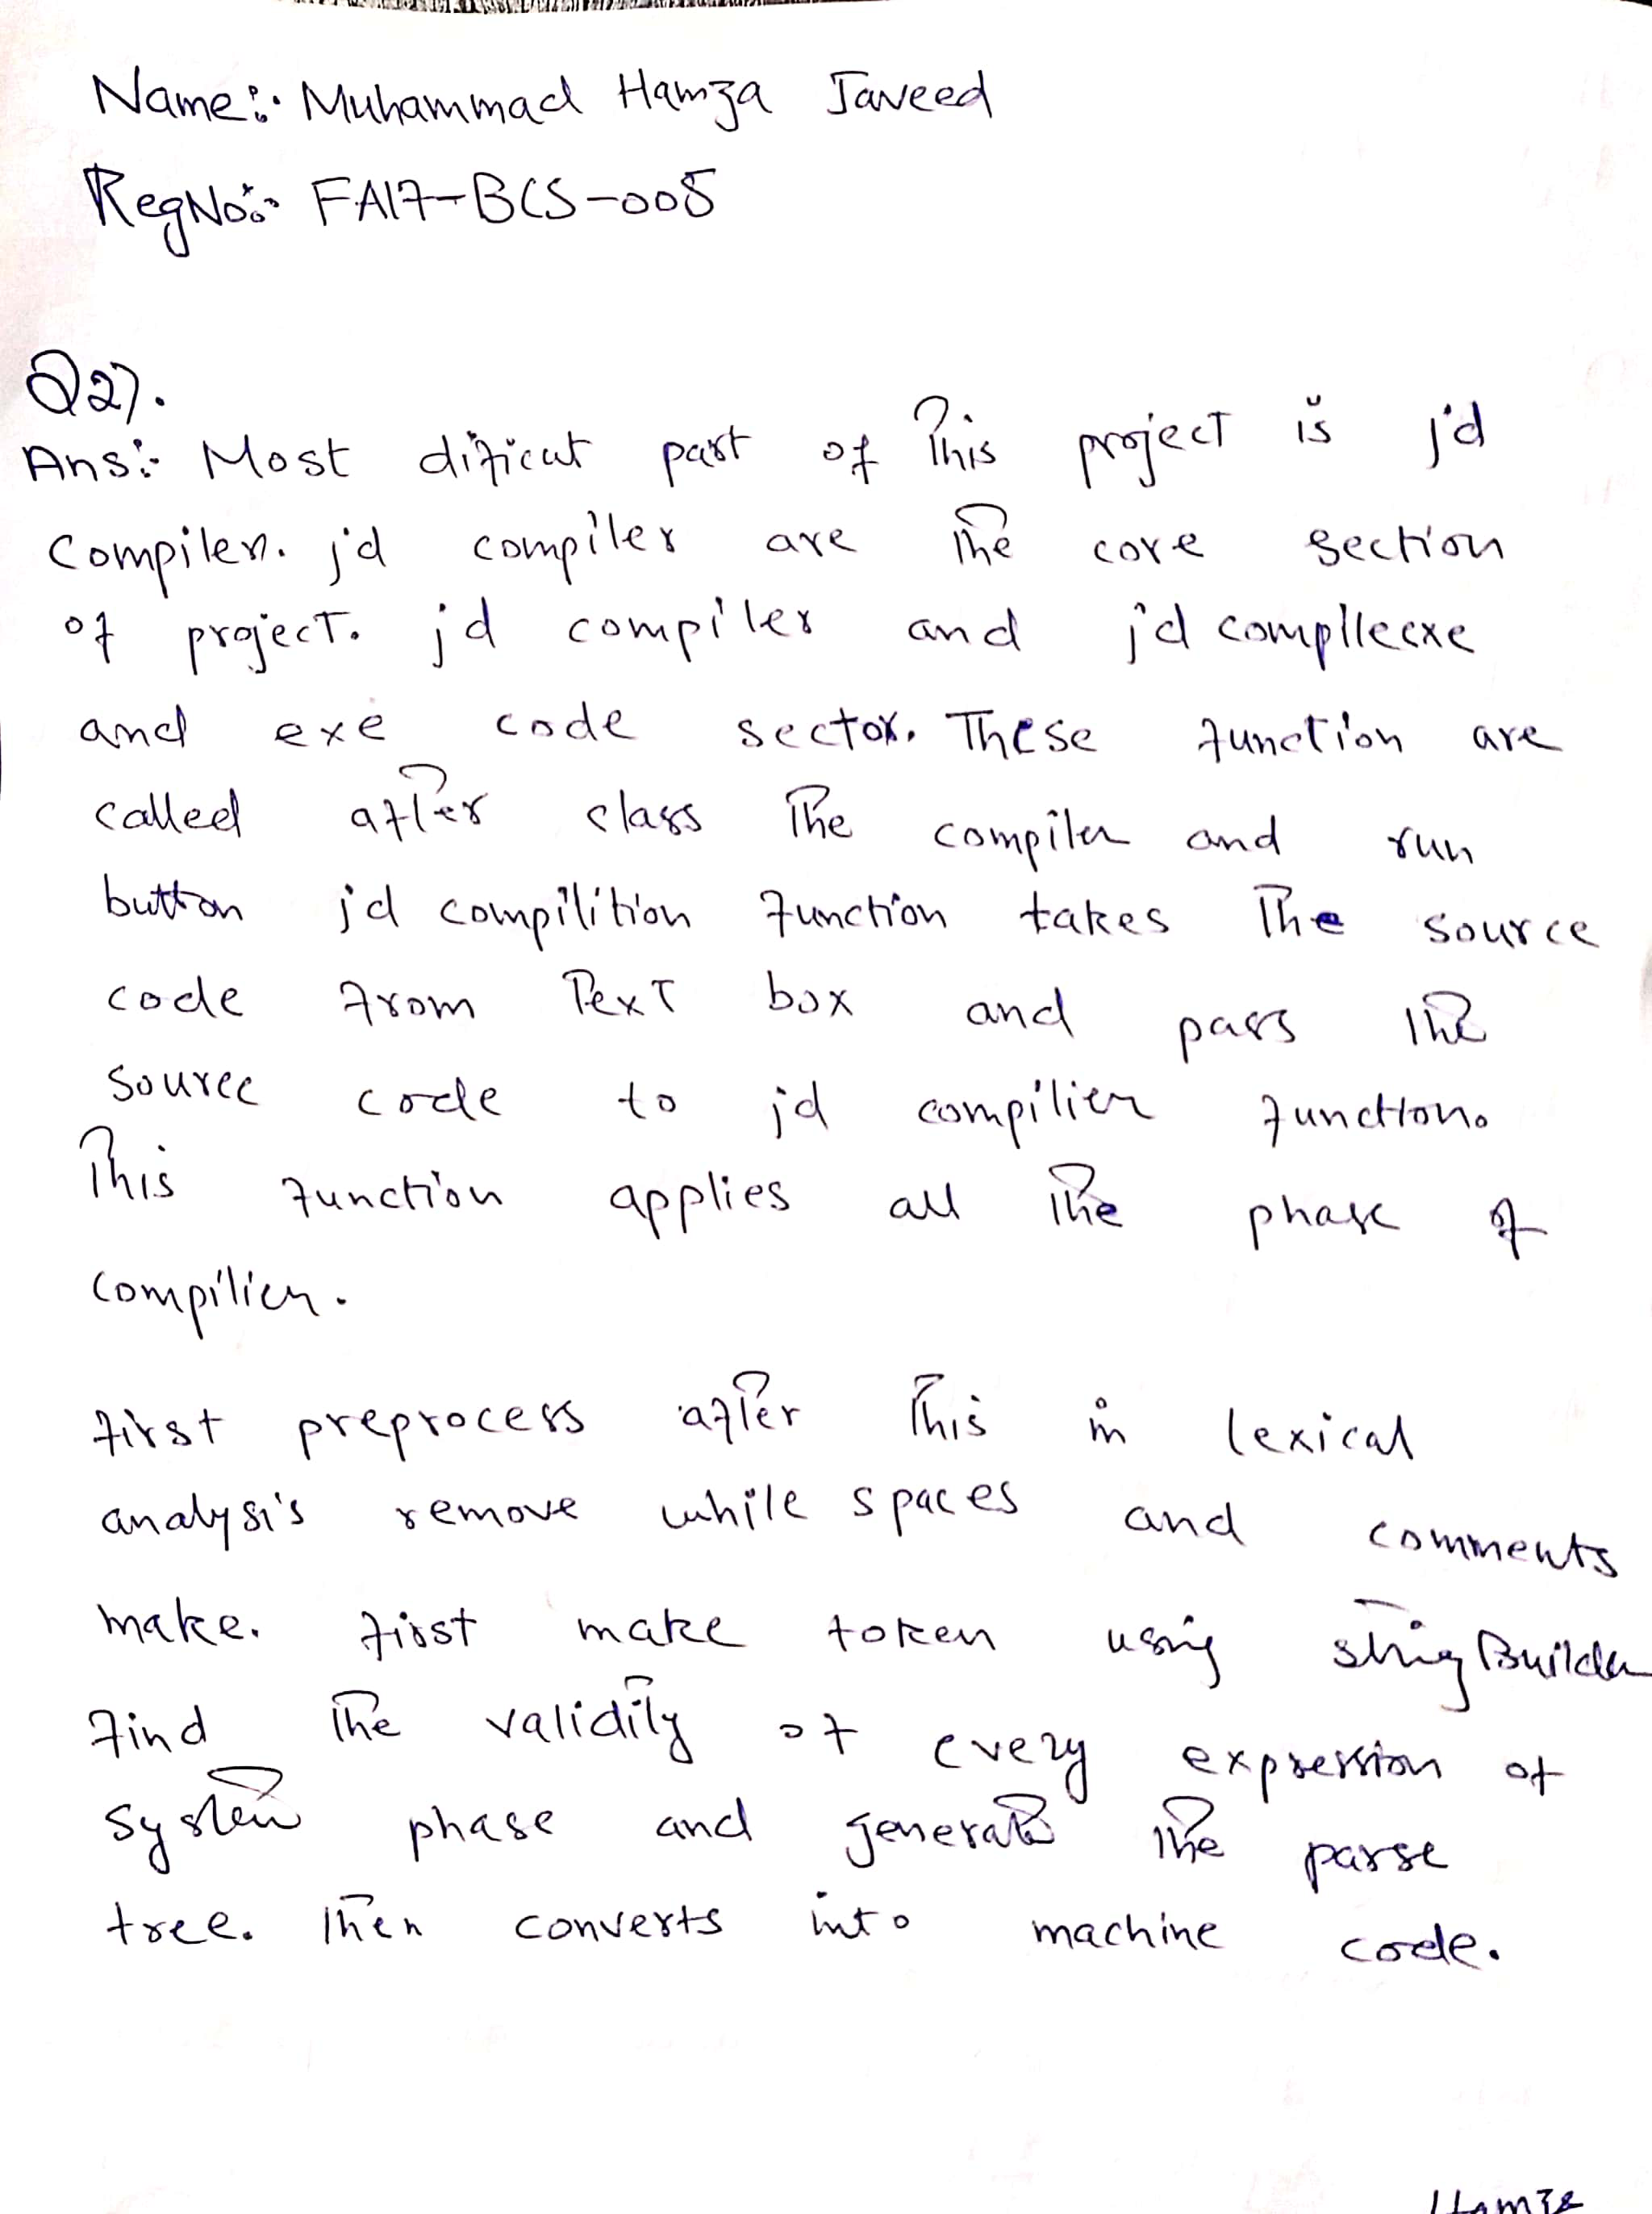

Name’: Mulammacd Hwa Javeed
CS FAR—~R(S —00S

Shi)’; Most dpe past of Tris roy? Tos yd
Compile? yd compile oN the cay 4
o} projec: ja comp! let and
oma exe cnde

Sech om
1 4 Complicene
Sek These  Juneliow

OY
called arl2t cla ‘Me Compile cud Curry
bution fd Compili Hon Functor takes lhe source
code Arom WxT box ane pas WL
SOULE _ c sele do jd Compt Wem Jun ction,

this Junction ap pli eS oN We pha 1
Comprlicn .

Wat peegreces ale HS (Gea

amah $ S _ x ewok whilt Spaced aug ¢nmneiky
malke. st o

mare t o teem Ue Shen Clete
Hind Te validly =x EL, e
>3 Wo phase and General 32 -

tece. Ihen converts wre machine cade.

blLamts
 



In [5]:
from PIL import Image
_img = IMG_DIR+'s.jpg'
img = Image.open(_img)

import minecart

pdffile = open('c.pdf', 'rb')
doc = minecart.Document(pdffile)
page = doc.get_page(0)

#erosion
def erode(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)


def thresholding(image):
    image = cv2.GaussianBlur(image,(3,3),0)
    image = erode(image)
    image = cv2.threshold(image,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return image



def imagefilter(image,method):
    image = set_image_dpi(image)
    image = cv2.imread(image)
    image = cv2.resize(image,None,fx=3,fy=3,interpolation=cv2.INTER_AREA)  
    image = get_grayscale(image)
    image = thresholding(image)
    image = cv2.bilateralFilter(image,9,75,75)
    image = cv2.equalizeHist(image)
    cv2.imwrite("Cropped.png", image)
    return image


def readpdf():
    for page in doc.iter_pages():
        for i in page.images:
            image = i.as_pil()
            display(image)
            custom_config = r'-l eng+eng-2+eng-3+eng4+eng5'
            d = pytesseract.image_to_string(imagefilter(image,'INTER_NEAREST'), output_type=Output.DICT,config=custom_config)
            print(d['text'],'\n')
            
        
custom_config = r'-l eng+eng-2+eng-3+eng4+eng5 --psm 6'
d = pytesseract.image_to_string(imagefilter(img,'INTER_NEAREST'), output_type=Output.DICT,config=custom_config)
print(d['text'],'\n')             

readpdf()